In [1]:
import numpy as np 
import pandas as pd 
import altair as alt
from venn import venn 
import upsetplot
import matplotlib.pyplot as plt
from Commons.data_processing import *

In [2]:
# get data file
file = r'.\Working_Datafiles\All_N_Glycopeptides.csv'
df = pd.read_csv(file)

# organize contents
df = df.sort_values(['concentration', 'temperature'], ascending=[False, True])

In [20]:
df[(df.concentration==1.0) & (df.sequence=='NLTK')]

,accession,description,checked,confidence,annotated_sequence,modifications,master_protein_accessions,rt_min,mz_da,charge,...,sequence,data_source,temperature,run,concentration,dilution,glycan,glycan_type,degree_sial,pep_mods
683,P61823,Ribonuclease pancreatic OS=Bos taurus OX=9913 ...,True,High,[R].NLTK.[D],1xHexNAc(4)Hex(5)Fuc(1) [N1],P61823,18.0852,1122.46790,2,...,NLTK,1_30C_Run3,30C,Run3,1.0,1x,HexNAc(4)Hex(5)Fuc(1),Fucosylated,0,NLTK_HexNAc(4)Hex(5)Fuc(1)
684,P61823,Ribonuclease pancreatic OS=Bos taurus OX=9913 ...,True,High,[R].NLTK.[D],1xHexNAc(4)Hex(4)Fuc(1) [N1],P61823,17.4805,1041.44006,2,...,NLTK,1_30C_Run3,30C,Run3,1.0,1x,HexNAc(4)Hex(4)Fuc(1),Fucosylated,0,NLTK_HexNAc(4)Hex(4)Fuc(1)
685,P61823,Ribonuclease pancreatic OS=Bos taurus OX=9913 ...,True,High,[R].NLTK.[D],1xHexNAc(2)Hex(2) [N1],P61823,16.8097,603.27869,2,...,NLTK,1_30C_Run3,30C,Run3,1.0,1x,HexNAc(2)Hex(2),Paucimannose,0,NLTK_HexNAc(2)Hex(2)
686,P61823,Ribonuclease pancreatic OS=Bos taurus OX=9913 ...,True,High,[R].NLTK.[D],1xHexNAc(3)Hex(5) [N1],P61823,16.2898,948.39880,2,...,NLTK,1_30C_Run3,30C,Run3,1.0,1x,HexNAc(3)Hex(5),Complex,0,NLTK_HexNAc(3)Hex(5)
687,P61823,Ribonuclease pancreatic OS=Bos taurus OX=9913 ...,True,High,[R].NLTK.[D],1xHexNAc(2)Hex(4) [N1],P61823,16.2351,765.33234,2,...,NLTK,1_30C_Run3,30C,Run3,1.0,1x,HexNAc(2)Hex(4),Paucimannose,0,NLTK_HexNAc(2)Hex(4)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,P61823,Ribonuclease pancreatic OS=Bos taurus OX=9913 ...,True,High,[R].NLTK.[D],1xHexNAc(4)Hex(5)Fuc(1)NeuAc(1) [N1],P61823,29.8892,1268.01453,2,...,NLTK,1_60C_Run2,60C,Run2,1.0,1x,HexNAc(4)Hex(5)Fuc(1)NeuAc(1),Sialylated,Monosialylated,NLTK_HexNAc(4)Hex(5)Fuc(1)NeuAc(1)
131,P61823,Ribonuclease pancreatic OS=Bos taurus OX=9913 ...,True,High,[R].NLTK.[D],1xHexNAc(4)Hex(6)NeuAc(1) [N1],P61823,29.3498,1276.00989,2,...,NLTK,1_60C_Run2,60C,Run2,1.0,1x,HexNAc(4)Hex(6)NeuAc(1),Sialylated,Monosialylated,NLTK_HexNAc(4)Hex(6)NeuAc(1)
132,P61823,Ribonuclease pancreatic OS=Bos taurus OX=9913 ...,True,High,[R].NLTK.[D],1xHexNAc(3)Hex(6)NeuAc(1) [N1],P61823,26.6209,1174.47461,2,...,NLTK,1_60C_Run2,60C,Run2,1.0,1x,HexNAc(3)Hex(6)NeuAc(1),Sialylated,Monosialylated,NLTK_HexNAc(3)Hex(6)NeuAc(1)
163,P61823,Ribonuclease pancreatic OS=Bos taurus OX=9913 ...,True,High,[R].NLTK.[D],1xHexNAc(2)Hex(4) [N1],P61823,14.5619,765.33136,2,...,NLTK,1_60C_Run1,60C,Run1,1.0,1x,HexNAc(2)Hex(4),Paucimannose,0,NLTK_HexNAc(2)Hex(4)


# <b>What are our goals?</b>

1. Demonstrate that different temperatures yield different results
- Number of glycopeptides
- Number of unique peptide backbones
- Number of unique glycans
2. Demonstrate that glycopeptide subtypes are differing in response to temperature
- Do any classes resist this trend?
3. Show that sialylated glycopeptides are adversely affected
- Show change in number of terminal residues
4. What hypotheses can we eiliminate?

In [3]:
# How does performance change in accordance with temperature?

#  information to extract: num peptides, num unique glycans, num unique peptide backbones
temps, vals, kind, dilutions = [], [], [], []

for dilution, dil_frame in iterate_contents("dilution", df, get_item=True):
    for temp, temp_frame in iterate_contents("temperature", dil_frame, get_item=True):
        for run, run_frame in iterate_contents("run", temp_frame, get_item=True):

            unique_gly = len(run_frame.pep_mods.unique())
            dilutions.append(dilution)
            vals.append(unique_gly)
            temps.append(temp)
            kind.append("Unique Glycopeptides")

            unique_seq = len(run_frame.sequence.unique())
            dilutions.append(dilution)
            vals.append(unique_seq)
            temps.append(temp)
            kind.append("Unique Backbones")

            unique_glycans = len(run_frame.glycan.unique())
            dilutions.append(dilution)
            vals.append(unique_glycans)
            temps.append(temp)
            kind.append("Unique Glycans")

res = pd.DataFrame(
    {"Temperature": temps, "Kind": kind, "Values": vals, "Dilution": dilutions}
)

my_colors = alt.Color(
    "Temperature:N",
    scale=alt.Scale(
        domain=["30C", "45C", "60C"], range=["#6E6581", "#B0B2BB", "#6B8A97"]
    ),
)

conc_max_comparison = (
    alt.Chart(res)
    .mark_bar()
    .encode(
        x=alt.X("Temperature:N", axis=alt.Axis(labelAngle=-45)),
        y=alt.Y("mean(Values):Q", title="Number of Identifications"),
        color=my_colors,
    )
).properties(width=45, height=150)

cmc_err_bars = (
    alt.Chart(res)
    .mark_errorbar(extent="stdev")
    .encode(
        x=alt.X("Temperature:N", title="", axis=alt.Axis(labelAngle=-45)),
        y=alt.Y("mean(Values):Q", title=""),
    )
)

base = alt.layer(conc_max_comparison, cmc_err_bars).facet(
    column="Kind:N",
    spacing=50,
)

max_conc = base.transform_filter(alt.datum.Dilution == 1.0).properties(
    title="Temperature Differences, No Dilution"
)


all_conc = alt.vconcat()
for dilution in res.Dilution.unique():
    all_conc &= base.transform_filter(
        alt.datum.Dilution == dilution
    ).properties(title=f"Dilution = {dilution}")

all_conc.save(r'.\Figures\ID_Rates_Dilution.svg')


### <b>Commentary</b>

At all concentrations tested, the numebr of unique glycopeptides decreases as temperature rises. This trend is generally conserved when considering the number of unique glycans identified, dave for the two highest concentrations. These analyses revealed comparable or elevated number of unique glycans identified at 45C with significantly reduces quantities at 60C -- these quantities are lower than those in the 30C experiments, agreeing with the majority of the dataset.

However, within each concentration and across the experiment. When looking at the venn diagrams, they are consistent at each concentration and across all experiments. Knowing this, the difference in glycopeptide identifications stems largely from the differences in glycans presented.

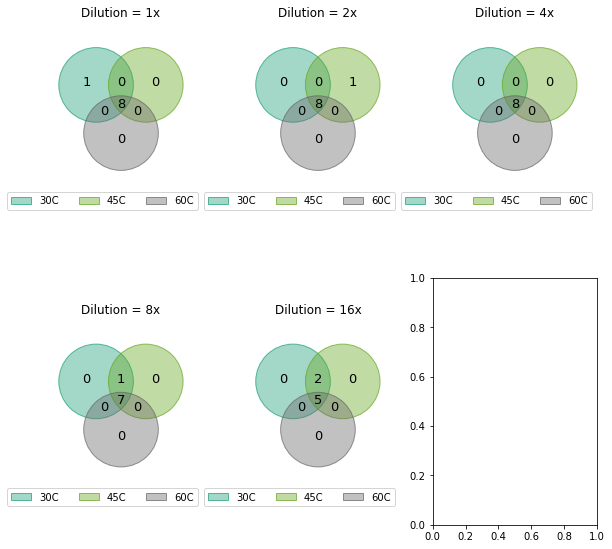

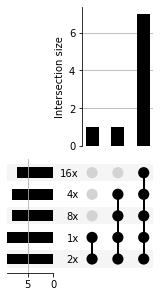

In [4]:
# How do the unique peptides compare across experiments?

global_overlap = dict()
for dilution, dil_frame in iterate_contents('dilution', df, get_item=True):
    global_overlap[dilution] = set(dil_frame.sequence.unique())
data = upsetplot.from_contents(global_overlap)


sample_overlap = dict()
dilutions = []

for dilution, dil_frame in iterate_contents("dilution", df, get_item=True):
    dilutions.append(dilution)
    d = dict()
    for temp, temp_frame in iterate_contents("temperature", dil_frame, get_item=True):
        d[temp] = set(temp_frame.sequence.unique())
    sample_overlap[dilution] = d

fig, axs = plt.subplots(2, 3, figsize=(10, 10))
for i, dilution in enumerate(dilutions):
    ax = axs.flat[i]
    venn(sample_overlap[dilution], ax=ax, cmap='Dark2')
    ax.set_title(f'Dilution = {dilution}')
    ax.legend(list(sample_overlap[dilution].keys()), bbox_to_anchor=(1, 0), ncol=3)

upsetplot.plot(data)
None

In [5]:
glycan_sub = df[
    [
        "sequence",
        "glycan",
        "glycan_type",
        "pep_mods",
        "num_psms",
        "temperature",
        "concentration",
        "dilution",
        "run",
    ]
]

glycan_color_scale = alt.Scale(
    domain=[
        'Sialylated',
        'Fucosylated',
        'Complex',
        'Paucimannose',
        'High Mannose',
    ],
    range=[
        '#6E6581',
        '#AF3A53',
        '#6B8A97',
        '#B0B2BB',
        '#658A64',
    ]
)

bars = (
    alt.Chart(glycan_sub)
    .mark_bar()
    .encode(
        x=alt.X("temperature:N", title="", axis=alt.Axis(labelAngle=-45)),
        y=alt.Y("mean(my_count):Q", title="# Matches"),
        color=alt.Color("glycan_type:N", scale=glycan_color_scale),
    )
    .transform_aggregate(
        my_count='count(glycan_type)',
        groupby=['glycan_type', 'concentration', 'temperature', 'run']
    )
).properties(width=40, height=150)

err = (
    alt.Chart(glycan_sub)
    .mark_errorbar(extent='stdev')
    .encode(
        x=alt.X("temperature:N", title="", axis=alt.Axis(labelAngle=-45)),
        y=alt.Y("mean(my_count):Q", title="# Matches"),
    )
    .transform_aggregate(
        my_count='count(glycan_type)',
        groupby=['glycan_type', 'concentration', 'temperature', 'run']
    )
)

glyc_by_concentration = alt.layer(bars, err).facet(
    column=alt.Column('glycan_type', title=''),
    row='concentration:N'
)

glyc_by_concentration.save(r'.\Figures\GlycanCount.svg')

In [6]:
boxes = alt.Chart(glycan_sub).mark_boxplot().encode(
    x=alt.X('temperature:N', title=''),
    y=alt.Y('num_psms:Q', title='# PSMs'),
    color=alt.Color('glycan_type:N', scale=glycan_color_scale)
).properties(
    height=125
)
alt.layer(boxes).facet(
    row='concentration:Q', 
    column='glycan_type:N'
)

alt.FacetChart(...)

### <b>Commentary</b>

When comparing the glycan classes identified in all experiments, we notice a few prevailing trends. At higher concentrations, both sialylated glycopeptides seem to show increased identification rates at 45 dgrees before dropping at 60C. This trend may also be seen in glycopeptides with complex glycans at most concentrations and for fucosylated glycopeptides at concentrations where they were detected.

High manoose glycopeptides, though showing deviation over the course of each experiment, largely resist this trend. This could explain our previous results that demonstrated higher identification rates of high mannose glycans as temperature increases. Of note, paucimannose glycopeptides tend to demonstrate a trend counter to the overarching concensus. These glycopeptides seem to increase in identification at 45C without a significant drop off at 60C. Why?  

In [9]:
test = df[
    [
        "sequence",
        "glycan",
        "glycan_type",
        "pep_mods",
        "temperature",
        "concentration",
        "run",
        "degree_sial",
    ]
]

test = test[test.degree_sial != "0"]

sial_color_scale = alt.Scale(
    domain=["Monosialylated", "Disialylated", "Trisialylated"],
    range=["#B0B2BB", "#6B8A97", "#AF3A53"],
)


sial = (
    alt.Chart(test)
    .mark_bar()
    .encode(
        x=alt.X("temperature:N", title="", axis=alt.Axis(labelAngle=-45)),
        y=alt.Y("mean(my_count):Q", title="Glycan Count"),
        color=alt.Color("degree_sial:N", scale=sial_color_scale),
    )
    .transform_aggregate(
        my_count="count(degree_sial):Q",
        groupby=["temperature", "run", "concentration", "degree_sial"],
    )
).properties(width=50, height=150)

err = (
    alt.Chart(test)
    .mark_errorbar(extent="stdev")
    .encode(
        x=alt.X("temperature:N", title="", axis=alt.Axis(labelAngle=-45)),
        y=alt.Y("mean(my_count):Q", title=''),
    )
    .transform_aggregate(
        my_count="count(degree_sial):Q",
        groupby=["temperature", "run", "concentration", "degree_sial"],
    )
)

alt.layer(sial, err).facet(
    column=alt.Column("degree_sial:O"), row=alt.Row("concentration:Q")
).save(r'.\Figures\DegreeSial.svg')


In [108]:
test_case = df.loc[
    (df.concentration==0.25) &
    (df.glycan_type=='Sialylated'), :
]

sub_30 = test_case[test_case.temperature=='30C'].pep_mods.tolist()
sub_45 = test_case[test_case.temperature=='45C'].pep_mods.tolist()
sub_60 = test_case[test_case.temperature=='60C'].pep_mods.tolist()

set(sub_60) - set(sub_45) - set(sub_30)
to_search = set(sub_45) - set(sub_30) - set(sub_60)
to_search = [x.split('_')[1] for x in to_search]
to_search
set(sub_45) - set(sub_30) - set(sub_60)
set(sub_30) - set(sub_45) - set(sub_60)

{'CVYNCSFIK_HexNAc(4)Hex(5)NeuGc(2)',
 'KLCPDCPLLAPLNDSR_HexNAc(4)Hex(5)NeuAc(1)',
 'LCPDCPLLAPLNDSR_HexNAc(4)Hex(5)NeuGc(2)',
 'LCPDCPLLAPLNDSR_HexNAc(5)Hex(6)Fuc(1)NeuGc(1)',
 'LCPDCPLLAPLNDSR_HexNAc(5)Hex(6)NeuAc(3)',
 'NLTK_HexNAc(3)Hex(6)NeuAc(1)',
 'NPEYNK_HexNAc(3)Hex(4)NeuAc(1)'}

In [17]:
test_case = df.loc[
    (df.concentration==1.0) &
    (df.glycan_type=='Sialylated'), :
]


In [35]:
# find all monosialylated that are at 45C and not 30C
# for any of these species, do are there any occurrences of disalylated peptides at lower temperatures?

mono_30 = test_case.loc[
    (test_case.degree_sial=='Monosialylated') & 
    (test_case.temperature=='30C')
]
mono_45 = test_case.loc[
    (test_case.degree_sial=='Monosialylated') & 
    (test_case.temperature=='45C')
]
di_30 = test_case.loc[
    (test_case.degree_sial=='Disialylated') & 
    (test_case.temperature=='30C')
]
di_45 = test_case.loc[
    (test_case.degree_sial=='Disialylated') & 
    (test_case.temperature=='45C')
]
only_45 = mono_45[~mono_45.pep_mods.isin(mono_30.pep_mods.tolist())]
for pep in only_45.pep_mods.unique():
    peptide, glycan = pep.split('_')

    sub = di_45[di_45.sequence==peptide]
    if not sub.empty:
        print(peptide, glycan)
        print(sub[['sequence', 'glycan', 'mz_da', 'rt_min']].drop_duplicates(['sequence', 'glycan']))
        print(only_45[only_45.pep_mods==pep][['sequence', 'glycan', 'mz_da', 'rt_min']].drop_duplicates(['sequence', 'glycan']))

QNGTLSK HexNAc(5)Hex(6)NeuGc(1)
     sequence                           glycan       mz_da   rt_min
1471  QNGTLSK  HexNAc(4)Hex(5)NeuAc(1)NeuGc(1)  1484.58789  31.2492
1472  QNGTLSK          HexNAc(4)Hex(5)NeuAc(2)  1476.58777  30.6860
1473  QNGTLSK          HexNAc(4)Hex(5)NeuGc(2)  1493.08643  30.2217
     sequence                   glycan       mz_da  rt_min
1468  QNGTLSK  HexNAc(5)Hex(6)NeuGc(1)  1521.60669  25.712
QNGTLSK HexNAc(4)Hex(4)NeuAc(1)
     sequence                           glycan       mz_da   rt_min
1471  QNGTLSK  HexNAc(4)Hex(5)NeuAc(1)NeuGc(1)  1484.58789  31.2492
1472  QNGTLSK          HexNAc(4)Hex(5)NeuAc(2)  1476.58777  30.6860
1473  QNGTLSK          HexNAc(4)Hex(5)NeuGc(2)  1493.08643  30.2217
     sequence                   glycan       mz_da   rt_min
1480  QNGTLSK  HexNAc(4)Hex(4)NeuAc(1)  1247.46802  23.8138
NPEYNK HexNAc(5)Hex(6)NeuGc(1)
     sequence                           glycan       mz_da   rt_min
1507   NPEYNK          HexNAc(4)Hex(5)NeuGc(2)  1501.06

In [40]:
only_45[only_45.glycan == "HexNAc(5)Hex(6)NeuGc(1)"][['pep_mods', 'mz_da', 'delta_m_ppm', 'rt_min']]

,pep_mods,mz_da,delta_m_ppm,rt_min
1468,QNGTLSK_HexNAc(5)Hex(6)NeuGc(1),1521.60669,0.80,25.7120
1486,NPEYNK_HexNAc(5)Hex(6)NeuGc(1),1530.08813,2.46,33.2138
1510,NPEYNK_HexNAc(5)Hex(6)NeuGc(1),1530.58582,327.83,33.3325
1570,QNGTLSK_HexNAc(5)Hex(6)NeuGc(1),1522.10718,329.83,26.1084


['NLTK_HexNAc(4)Hex(6)NeuAc(1)',
 'NLTK_HexNAc(3)Hex(6)NeuAc(1)',
 'CVYNCSFIK_HexNAc(4)Hex(5)NeuAc(1)',
 'NPEYNK_HexNAc(3)Hex(4)NeuAc(1)',
 'NPEYNK_HexNAc(4)Hex(5)NeuAc(1)',
 'QNGTLSK_HexNAc(3)Hex(4)NeuAc(1)',
 'QNGTLSK_HexNAc(4)Hex(5)Fuc(1)NeuAc(1)',
 'LCPDCPLLAPLNDSR_HexNAc(5)Hex(5)NeuAc(1)',
 'LCPDCPLLAPLNDSR_HexNAc(5)Hex(6)Fuc(1)NeuAc(1)',
 'LCPDCPLLAPLNDSR_HexNAc(5)Hex(6)NeuAc(1)',
 'QNGTLSK_HexNAc(5)Hex(6)NeuAc(1)',
 'LCPDCPLLAPLNDSR_HexNAc(4)Hex(5)Fuc(1)NeuAc(1)',
 'QNGTLSK_HexNAc(4)Hex(5)NeuAc(1)']

In [111]:
counts = test_case.pep_mods.value_counts()
valid = counts[counts.values == 3].keys()
subset = test_case[test_case.pep_mods.isin(valid)]
subset.to_csv(r'.\Working_DataFiles\30_only_2.csv', index=False)
subset

,accession,description,checked,confidence,annotated_sequence,modifications,master_protein_accessions,rt_min,mz_da,charge,...,sequence,data_source,temperature,run,concentration,dilution,glycan,glycan_type,degree_sial,pep_mods
1110,Q3SZR3,Alpha-1-acid glycoprotein OS=Bos taurus OX=991...,True,High,[K].CVYNCSFIK.[I],2xCarbamidomethyl [C1; C5]; 1xHexNAc(4)Hex(5)N...,Q3SZR3,43.2355,1142.43469,3,...,CVYNCSFIK,025_30C_Run3,30C,Run3,0.25,4x,HexNAc(4)Hex(5)NeuGc(2),Sialylated,Disialylated,CVYNCSFIK_HexNAc(4)Hex(5)NeuGc(2)
1180,Q3SZR3,Alpha-1-acid glycoprotein OS=Bos taurus OX=991...,True,High,[K].CVYNCSFIK.[I],2xCarbamidomethyl [C1; C5]; 1xHexNAc(4)Hex(5)N...,Q3SZR3,61.8448,1714.10413,2,...,CVYNCSFIK,025_30C_Run1,30C,Run1,0.25,4x,HexNAc(4)Hex(5)NeuGc(2),Sialylated,Disialylated,CVYNCSFIK_HexNAc(4)Hex(5)NeuGc(2)
1233,Q3SZR3,Alpha-1-acid glycoprotein OS=Bos taurus OX=991...,True,High,[K].CVYNCSFIK.[I],2xCarbamidomethyl [C1; C5]; 1xHexNAc(4)Hex(5)N...,Q3SZR3,43.4558,1143.10278,3,...,CVYNCSFIK,025_30C_Run2,30C,Run2,0.25,4x,HexNAc(4)Hex(5)NeuGc(2),Sialylated,Disialylated,CVYNCSFIK_HexNAc(4)Hex(5)NeuGc(2)


In [52]:
counts = test_case.pep_mods.value_counts()
valid = counts[counts.values == 5].keys()
subset = test_case[test_case.pep_mods.isin(valid)]
subset.to_csv(r'.\Working_DataFiles\for_eic_extract_notfound.csv', index=False)

In [11]:
glycan_color_scale = alt.Scale(
    domain=[
        'Sialylated',
        'Fucosylated',
        'Complex',
        'Paucimannose',
        'High Mannose',
    ],
    range=[
        '#6E6581',
        '#AF3A53',
        '#6B8A97',
        '#B0B2BB',
        '#658A64',
    ]
)

selection = alt.selection_interval(bind='scales')

ticks = alt.Chart(df).mark_tick(thickness=5).encode(
    x=alt.X('avg_rt:Q', title='Average Retention Time (min)'),
    y=alt.Y('temperature:N', title='Tempeature'),
    color=alt.Color('glycan_type:N', scale=glycan_color_scale),
    tooltip=['pep_mods']
).transform_aggregate(
    avg_rt='mean(rt_min)',
    groupby=['dilution', 'temperature', 'pep_mods', 'glycan_type']
).properties(
    width=1200
).interactive().add_selection(
    selection
)

alt.layer(ticks).facet(
    row='dilution:N'
)

alt.FacetChart(...)

In [116]:
df[(df.mz_da > 1138) & (df.mz_da < 1142)]

,accession,description,checked,confidence,annotated_sequence,modifications,master_protein_accessions,rt_min,mz_da,charge,...,sequence,data_source,temperature,run,concentration,dilution,glycan,glycan_type,degree_sial,pep_mods
946,Q3SZR3,Alpha-1-acid glycoprotein OS=Bos taurus OX=991...,True,High,[K].CVYNCSFIK.[I],2xCarbamidomethyl [C1; C5]; 1xHexNAc(4)Hex(5)N...,Q3SZR3,52.1166,1141.94934,2,...,CVYNCSFIK,05_30C_Run2,30C,Run2,0.5,2x,HexNAc(4)Hex(5)NeuGc(2),Sialylated,Disialylated,CVYNCSFIK_HexNAc(4)Hex(5)NeuGc(2)


In [61]:
import re 
def get_saccharides(glycans):
    res = pd.DataFrame()

    for glycan in glycans:
        reg = re.compile(r'(\w*\()(\d*\))')
        matches = re.finditer(reg, glycan)
        d = dict()
        for match in matches:
            d[match.group(1)[:-1]] = match.group(2)[:-1]
        res = pd.concat([res, pd.DataFrame(d, index=range(1))])
    return res.fillna(0)

In [62]:
get_saccharides(test_case.glycan)

,HexNAc,Hex,NeuAc,Fuc,NeuGc
0,3,6,1,0,0
0,5,6,2,0,0
0,5,6,2,0,0
0,4,5,2,0,0
0,5,6,3,0,0
...,...,...,...,...,...
0,5,6,1,0,0
0,4,5,2,0,0
0,4,5,0,0,2
0,4,5,1,0,0
